In [1]:
# Loading magnetic contour line data from WACCM output
# To use in plots of WACCM vs COSMIC occ freqs

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as mcm
# #jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree


/tmp/ipykernel_741435/2720019580.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [3]:
Month = '06'
filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-' + str(Month) + '.nc' 

ds = xr.open_dataset(filename)

ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALONM = ds.variables['ALONM'] #Magnetic latitude at each geographic coordinate

lon = ds.variables['lon']
lat = ds.variables['lat']

ds

<xarray.Dataset>
Dimensions:          (lat: 96, lon: 144, mlat: 97, mlon: 80, zlon: 1, nbnd: 2,
                      lev: 126, ilev: 127, time: 1)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mlat             (mlat) float64 -90.0 -88.12 -86.24 ... 86.24 88.12 90.0
  * mlon             (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * zlon             (zlon) float64 0.0
  * lev              (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev             (ilev) float64 3.551e-10 4.559e-10 ... 985.1 1e+03
  * time             (time) object 0001-07-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/713)
    gw               (lat) float64 ...
    zlon_bnds        (zlon, nbnd) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    ...               ...
    WD_HOCL          (time, lat, lon) float32 ...
    WI               (time, lev, lat, lon) float32 ...
    WTHzm            (time, ilev, lat, zlon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    e                (time, lev, lat, lon) float32 ...
    e_SRF            (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport
    logname:           earfw
    host:              d13s7b4.arc4.lee
    initial_file:      /nobackup/earfw/cesm2/cases/ACP_CESM213_FX2000_f19_f19...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [4]:
print(ALATM[0,:,:].values)

[[-74.11462  -74.11462  -74.11462  ... -74.11462  -74.11462  -74.11462 ]
 [-72.95576  -73.017166 -73.08058  ... -72.784485 -72.839325 -72.89645 ]
 [-71.721504 -71.835655 -71.95369  ... -71.40361  -71.50534  -71.61134 ]
 ...
 [ 82.368866  82.238014  82.1099   ...  82.77685   82.63843   82.50239 ]
 [ 82.93239   82.86128   82.790825 ...  83.1484    83.07608   83.004036]
 [ 82.921776  82.921776  82.921776 ...  82.921776  82.921776  82.921776]]


In [5]:
# min_value = np.min(ALATM[0,:,:])
# max_value = np.max(ALATM[0,:,:])

# print("Minimum Value:", min_value)
# print("Maximum Value:", max_value)

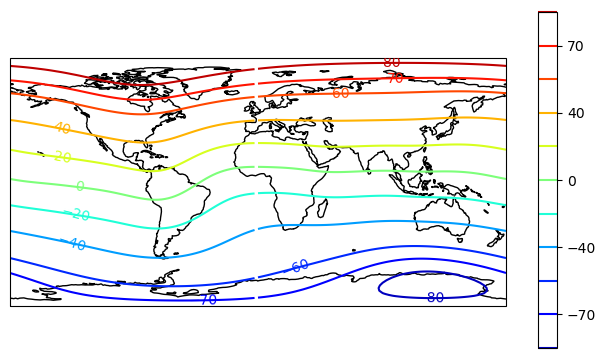

In [6]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_global()

contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]

C = plt.contour(lon, lat, ALATM[0,:,:], 
                 cmap=jet, #locator=ticker.LogLocator(),
                 transform=ccrs.PlateCarree(),
                levels=contour_levels, vmin=-90, vmax=90
               )
ax.coastlines()

clabels = plt.clabel(C, inline=True, fontsize=10)

def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # Adjust these values to position and size the colorbar # [x, y, width, height]
cbar = plt.colorbar(C, cax=cbar_ax, pad=0.07)#,format=ticker.FuncFormatter(fmt))

figname= 'Mag_lat_contour_lines.png'

plt.savefig('./Figures/Wuhu_IonTr_run/'+str(figname), dpi = 400, bbox_inches='tight')

In [7]:

# Specify the path for the new NetCDF file
output_file = 'Nc_Files/SpE_Output/Mag_Coords/Mag_lat_contours.nc'  # Replace with the desired path for the new file

new_ds = xr.Dataset({'ALATM': ALATM})

# Save the new Dataset to a NetCDF file
new_ds.to_netcdf(output_file)

# Close the source NetCDF file and the new Dataset
ds.close()
new_ds.close()
